In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd Downloads

C:\Users\shashank s\Downloads


In [3]:
data=pd.read_csv(r'spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data=data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.shape

(5572, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Spam detection')

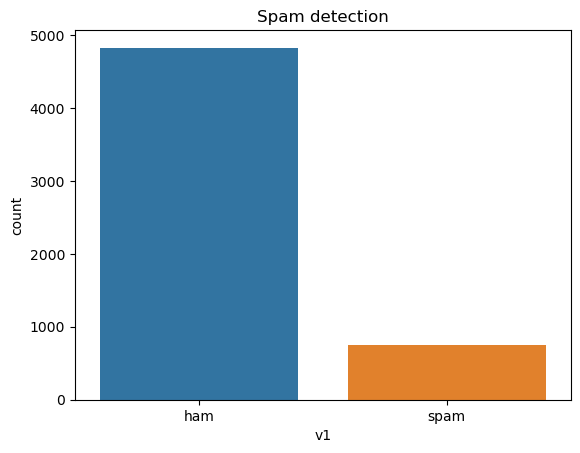

In [10]:
sns.countplot(x='v1', data=data)
plt.title("Spam detection")

In [11]:
for i in range(5):
    print("Mail: ", [i])
    print(data['v2'].iloc[i], "\n")
    print("Mail: ", data['v1'].iloc[i], "\n\n")

Mail:  [0]
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

Mail:  ham 


Mail:  [1]
Ok lar... Joking wif u oni... 

Mail:  ham 


Mail:  [2]
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

Mail:  spam 


Mail:  [3]
U dun say so early hor... U c already then say... 

Mail:  ham 


Mail:  [4]
Nah I don't think he goes to usf, he lives around here though 

Mail:  ham 




In [12]:
def no_of_words(text):
    words= text.split()
    word_count=len(words)
    return word_count

In [13]:
data['word count']= data['v2'].apply(no_of_words)

In [14]:
data.head()

,v1,v2,word count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [15]:
data.v1.replace("ham", 1, inplace=True)
data.v1.replace("spam", 2, inplace=True)

In [16]:
data.head()

,v1,v2,word count
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13


In [19]:
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [22]:
def data_processing(text):
    text=text.lower()
    text=re.sub('<br />', '', text)
    text=re.sub(r"https\S+|www\S+|http\S+", '', text, flags= re.MULTILINE)
    text=re.sub(r'\@w+|\#', '', text)
    text=re.sub(r'[^\w\s]', '', text)
    text_tokens= word_tokenize(text)
    filtered_text= [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [23]:
data.v2=data['v2'].apply(data_processing)

In [24]:
duplicated_count= data.duplicated().sum()
print("Number of duplicate entries", duplicated_count)

Number of duplicate entries 442


In [25]:
data=data.drop_duplicates('v2')

In [26]:
data.shape

(5113, 3)

In [27]:
stemmer= PorterStemmer()
def stemming(data):
    text= [stemmer.stem(word) for word in data]
    return data

In [28]:
data.v2= data['v2'].apply(lambda x: stemming(x))

In [29]:
data['word count']= data['v2'].apply(no_of_words)
data.head()

,v1,v2,word count
0,1,go jurong point crazy available bugis n great ...,16
1,1,ok lar joking wif u oni,6
2,2,free entry 2 wkly comp win fa cup final tkts 2...,23
3,1,u dun say early hor u c already say,9
4,1,nah dont think goes usf lives around though,8


In [30]:
ham=data[data.v1==1]
ham.head()

,v1,v2,word count
0,1,go jurong point crazy available bugis n great ...,16
1,1,ok lar joking wif u oni,6
3,1,u dun say early hor u c already say,9
4,1,nah dont think goes usf lives around though,8
6,1,even brother like speak treat like aids patent,8


In [32]:
from collections import Counter
count= Counter()
for text in ham['v2'].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('u', 875),
 ('im', 431),
 ('get', 295),
 ('2', 288),
 ('ltgt', 254),
 ('dont', 241),
 ('ok', 240),
 ('go', 239),
 ('got', 237),
 ('know', 221),
 ('like', 219),
 ('come', 207),
 ('good', 204),
 ('ill', 203),
 ('ur', 197)]

In [33]:
ham_words= pd.DataFrame(count.most_common(15))
ham_words.columns= ['word', 'count']
ham_words.head()

,word,count
0,u,875
1,im,431
2,get,295
3,2,288
4,ltgt,254


In [34]:
spam= data[data.v1==2]
spam.head()

,v1,v2,word count
2,2,free entry 2 wkly comp win fa cup final tkts 2...,23
5,2,freemsg hey darling 3 weeks word back id like ...,19
8,2,winner valued network customer selected receiv...,18
9,2,mobile 11 months u r entitled update latest co...,18
11,2,six chances win cash 100 20000 pounds txt csh1...,21


In [35]:
count= Counter()
for text in spam['v2'].values:
    for word in text.split():
        count[word]+=1
count.most_common(15)

[('call', 288),
 ('free', 178),
 ('2', 151),
 ('u', 122),
 ('txt', 121),
 ('ur', 117),
 ('stop', 103),
 ('text', 100),
 ('mobile', 99),
 ('claim', 94),
 ('4', 91),
 ('reply', 89),
 ('prize', 77),
 ('get', 67),
 ('new', 63)]

In [36]:
spam_words= pd.DataFrame(count.most_common(15))
spam_words.columns= ['word', 'count']
spam_words.head()

,word,count
0,call,288
1,free,178
2,2,151
3,u,122
4,txt,121


In [37]:
x=data['v2']
y=data['v1']

In [38]:
vect= TfidfVectorizer()
x= vect.fit_transform(data['v2'])

In [40]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
print("x_train size:  ", x_train.shape)
print("x_test size: ", x_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size:  ", y_test.shape)

x_train size:   (4090, 9336)
x_test size:  (1023, 9336)
y_train size:  (4090,)
y_test size:   (1023,)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [44]:
log=LogisticRegression()
log.fit(x_train, y_train)
log_pred=log.predict(x_test)
log_acc=accuracy_score(log_pred, y_test)
print("Test accuracy :{:.2f}%".format(log_acc*100))

Test accuracy :93.84%


In [45]:
print(confusion_matrix(y_test, log_pred))
print("\n")
print(classification_report(y_test, log_pred))

[[885   3]
 [ 60  75]]


              precision    recall  f1-score   support

           1       0.94      1.00      0.97       888
           2       0.96      0.56      0.70       135

    accuracy                           0.94      1023
   macro avg       0.95      0.78      0.83      1023
weighted avg       0.94      0.94      0.93      1023



In [46]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 95.70%


In [47]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[888   0]
 [ 44  91]]


              precision    recall  f1-score   support

           1       0.95      1.00      0.98       888
           2       1.00      0.67      0.81       135

    accuracy                           0.96      1023
   macro avg       0.98      0.84      0.89      1023
weighted avg       0.96      0.96      0.95      1023



In [48]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 97.75%


In [49]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[883   5]
 [ 18 117]]


              precision    recall  f1-score   support

           1       0.98      0.99      0.99       888
           2       0.96      0.87      0.91       135

    accuracy                           0.98      1023
   macro avg       0.97      0.93      0.95      1023
weighted avg       0.98      0.98      0.98      1023



In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.892 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.885 total time=   0.0s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.891 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.891 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.888 total time=   0.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.950 total time=   0.0s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.940 total time=   0.0s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.940 total time=   0.0s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.933 total time=   0.0s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.936 total time=   0.0s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.969 total time=   0.0s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [51]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.97
best parameters:  {'C': 10, 'loss': 'hinge'}


In [52]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

Test accuracy: 98.04%
[[885   3]
 [ 17 118]]


              precision    recall  f1-score   support

           1       0.98      1.00      0.99       888
           2       0.98      0.87      0.92       135

    accuracy                           0.98      1023
   macro avg       0.98      0.94      0.96      1023
weighted avg       0.98      0.98      0.98      1023



In [53]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[885   3]
 [ 17 118]]


              precision    recall  f1-score   support

           1       0.98      1.00      0.99       888
           2       0.98      0.87      0.92       135

    accuracy                           0.98      1023
   macro avg       0.98      0.94      0.96      1023
weighted avg       0.98      0.98      0.98      1023

